In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import glob

In [4]:
print("Hello World")

Hello World


# 폴리곤 - 행정동 코드 매칭 후 딕셔너리화

In [ ]:
# code = pd.read_csv('polyCode.txt', sep = "|")
# code['polycode'] = code['`polycode`'].str.replace('`', '', regex = False)
# code['name'] = code['`name`'].str.replace('`', '', regex = False)
# code['full_name'] = code['`full_name`'].str.replace('`', '', regex = False)
# codeDict = dict(zip(code['polycode'], code['full_name']))

In [ ]:
# Sample 데이터 확인용
data0701 = pd.read_csv('E:\\DMU\\공모전 등\\Seoul BigData\\Big-Data-Campus\\Sample_Data\\csv\\서울시 내국인 KT 생활이동 데이터.csv', sep = ',', encoding = 'euc-kr')
data0701.head()

,출발일시(start_dt),도착일시(arv_dt),출발지 코드(start_place_cd),도착지 코드(arv_place_cd),성별(sex_nm),연령대(agegrd_nm),출발 도착지 이동유형(start_arv_place_type),총이동시간(mvmn_time_sum),이동거리(mvmn_dstc),인구수(popl_cnt)
0,2019-09-30 05:00,2019-10-01 01:00,110107,350124,F,15,HE,1194,188308,4.06
1,2019-09-30 06:00,2019-10-01 00:20,110987,340217,M,25,EH,1086,82548,2.29
2,2019-09-30 06:20,2019-10-01 00:00,210353,111424,M,60,EH,1051,312459,3.48
3,2019-09-30 06:40,2019-10-01 01:00,111476,350476,F,20,HE,1105,167493,2.18
4,2019-09-30 07:00,2019-10-01 01:00,230489,110189,F,45,HE,1077,62420,3.34


In [24]:
data0701.columns = [re.sub(r'[^a-zA-Z_]', '', col) for col in data0701.columns]

In [25]:
data0701.head()

,start_dt,arv_dt,start_place_cd,arv_place_cd,sex_nm,agegrd_nm,start_arv_place_type,mvmn_time_sum,mvmn_dstc,popl_cnt
0,2019-09-30 05:00,2019-10-01 01:00,110107,350124,F,15,HE,1194,188308,4.06
1,2019-09-30 06:00,2019-10-01 00:20,110987,340217,M,25,EH,1086,82548,2.29
2,2019-09-30 06:20,2019-10-01 00:00,210353,111424,M,60,EH,1051,312459,3.48
3,2019-09-30 06:40,2019-10-01 01:00,111476,350476,F,20,HE,1105,167493,2.18
4,2019-09-30 07:00,2019-10-01 01:00,230489,110189,F,45,HE,1077,62420,3.34


In [26]:
data0701['start_place_cd'] = data0701['start_place_cd'].astype(str)
data0701['arv_place_cd'] = data0701['arv_place_cd'].astype(str)

In [27]:
data0701['start_place_cd'].head()

0    110107
1    110987
2    210353
3    111476
4    230489
Name: start_place_cd, dtype: object

In [28]:
# data0701.head()

In [29]:
print("Hello")

Hello


In [ ]:
# data0701['start_place_cd'] = data0701['start_place_cd'].map(codeDict)
# data0701['arv_place_cd'] = data0701['arv_place_cd'].map(codeDict)

NameError: name 'codeDict' is not defined

In [34]:
# data0701.head()

In [31]:
data0701['start_dt'] = pd.to_datetime(data0701['start_dt'])

In [32]:
data0701['move_st_hr'] = data0701['start_dt'].dt.floor("h")

In [33]:
data0701['move_st_hr']

0     2019-09-30 05:00:00
1     2019-09-30 06:00:00
2     2019-09-30 06:00:00
3     2019-09-30 06:00:00
4     2019-09-30 07:00:00
              ...        
395   2019-09-30 16:00:00
396   2019-09-30 16:00:00
397   2019-09-30 16:00:00
398   2019-09-30 16:00:00
399   2019-09-30 16:00:00
Name: move_st_hr, Length: 400, dtype: datetime64[ns]

In [34]:
data0701['arv_dt'] = pd.to_datetime(data0701['arv_dt'])
data0701['move_arv_hr'] = data0701['arv_dt'].dt.floor("h")

In [35]:
data0701[['move_st_hr', 'move_arv_hr', 'start_place_cd', 'arv_place_cd', 'sex_nm']].head()

,move_st_hr,move_arv_hr,start_place_cd,arv_place_cd,sex_nm
0,2019-09-30 05:00:00,2019-10-01 01:00:00,110107,350124,F
1,2019-09-30 06:00:00,2019-10-01 00:00:00,110987,340217,M
2,2019-09-30 06:00:00,2019-10-01 00:00:00,210353,111424,M
3,2019-09-30 06:00:00,2019-10-01 01:00:00,111476,350476,F
4,2019-09-30 07:00:00,2019-10-01 01:00:00,230489,110189,F


In [36]:
data0701['age_grp'] = (data0701['agegrd_nm'] // 10 ) * 10

In [37]:
data0701['age_grp']

0      10
1      20
2      60
3      20
4      40
       ..
395    50
396    20
397    50
398    60
399    50
Name: age_grp, Length: 400, dtype: int64

In [38]:
arange_datas = data0701[['move_st_hr', 'move_arv_hr', 'start_place_cd', 'arv_place_cd', 'sex_nm', 'age_grp','popl_cnt']]

In [39]:
arange_datas.to_csv('sample2.csv', encoding = 'euc-kr')

# input_folder 에 있는 파일별 순회하며 집계한 csv파일로 출력

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import glob

# polyCode.txt 파일 읽기 (행정동 코드/이름 정보)
code = pd.read_csv('polyCode.txt', sep="|")

# 컬럼 값에 포함된 ` 기호 제거
code['polycode'] = code['`polycode`'].str.replace('`', '', regex=False)
code['name'] = code['`name`'].str.replace('`', '', regex=False)
code['full_name'] = code['`full_name`'].str.replace('`', '', regex=False)

# polycode → full_name 매핑 딕셔너리 생성
codeDict = dict(zip(code['polycode'], code['full_name']))

# 입력/출력 폴더 지정
input_folder = 'datas/kt_move/202507'
output_folder = 'output_data_temp'
os.makedirs(output_folder, exist_ok=True)   # 출력 폴더 없으면 생성

# 입력 폴더 안의 모든 txt 파일 경로 가져오기
file_list = glob.glob(os.path.join(input_folder, "*.txt"))

for file_path in file_list:
    file_name = os.path.basename(file_path)   # 파일 이름만 추출

    # txt 파일 읽기
    df = pd.read_csv(file_path, sep='|')

    # 컬럼명 정리: 알파벳/언더바(_) 이외의 문자 제거
    df.columns = [re.sub(r'[^a-zA-Z_]', '', col) for col in df.columns]

    # 출발지/도착지 코드를 문자열로 변환
    df['start_place_cd'] = df['start_place_cd'].astype(str)
    df['arv_place_cd'] = df['arv_place_cd'].astype(str)

    # 코드값을 행정동 풀네임으로 매핑
    df['start_place_cd'] = df['start_place_cd'].map(codeDict)
    df['arv_place_cd'] = df['arv_place_cd'].map(codeDict)
    
    # 출발/도착 시간 datetime 변환
    df['start_dt'] = pd.to_datetime(df['start_dt'])
    df['move_st_hr'] = df['start_dt'].dt.floor("h")   # 출발 시간을 '시' 단위로 내림
    df['arv_dt'] = pd.to_datetime(df['arv_dt'])
    df['move_arv_hr'] = df['arv_dt'].dt.floor("h")   # 도착 시간을 '시' 단위로 내림
    
    # (필터링용 코드 — 현재는 주석 처리됨)
    # arange_datas = df[['move_st_hr', 'move_arv_hr', 'start_place_cd', 'arv_place_cd', 'sex_nm', 'age_grp','popl_cnt']]
    # mask = (arange_datas['move_st_hr'].dt.hour >= 11) & (arange_datas['move_st_hr'].dt.hour <= 16) \
    #      | (arange_datas['move_arv_hr'].dt.hour >= 11) & (arange_datas['move_arv_hr'].dt.hour <= 16)
    # arange_datas = arange_datas[mask]

    # 시간대·연령대별 출발 인구수 합계
    start_df_time = df.groupby(['move_st_hr', 'age_grp'])['popl_cnt'].sum().reset_index()
    # 시간대·연령대별 도착 인구수 합계
    arv_df_time = df.groupby(['move_arv_hr', 'age_grp'])['popl_cnt'].sum().reset_index()

    # 행정동 단위 집계 (출발 기준)
    start_df_time_dong = df.groupby(['start_dt', 'age_grp', '행정동 컬럼명'])['popl_cnt'].sum().reset_index()
    # 행정동 단위 집계 (도착 기준)
    arv_df_time_dong = df.groupby(['arv_dt', 'age_grp', '행정동 컬럼명'])['popl_cnt'].sum().reset_index()

    # 연령대(10살 단위) 변환
    df['age_grp'] = (df['agegrd_nm'] // 10) * 10
    
    # 저장할 파일명 정의
    file_name1 = str(file_name)+" start_time".replace('.txt', '.csv')
    file_name2 = str(file_name)+" arv_time".replace('.txt', '.csv')
    file_name3 = str(file_name)+" start_dong_time".replace('.txt', '.csv')
    file_name4 = str(file_name)+" arv_dong_time".replace('.txt', '.csv')

    # 저장 경로 설정
    output_path1 = os.path.join(output_folder, file_name1)
    output_path2 = os.path.join(output_folder, file_name2)
    output_path3 = os.path.join(output_folder, file_name3)
    output_path4 = os.path.join(output_folder, file_name4)

    # 각각 다른 집계 데이터를 CSV로 저장
    start_df_time.to_csv(output_path1, index=False, encoding='euc-kr')
    arv_df_time.to_csv(output_path2, index=False, encoding='euc-kr')
    start_df_time_dong.to_csv(output_path3, index=False, encoding='euc-kr')
    arv_df_time_dong.to_csv(output_path4, index=False, encoding='euc-kr')


In [54]:
FILE_PATH = "E:\\DMU\\공모전 등\\Seoul BigData\\Big-Data-Campus\\Sample_Data\\csv\\서울시 내국인 KT 생활이동 데이터.csv"

df = pd.read_csv(FILE_PATH, sep= ',', encoding='euc-kr')
df.columns = [re.sub(r'[^a-zA-Z_]', '', col) for col in df.columns]
df.head(5)

,start_dt,arv_dt,start_place_cd,arv_place_cd,sex_nm,agegrd_nm,start_arv_place_type,mvmn_time_sum,mvmn_dstc,popl_cnt
0,2019-09-30 05:00,2019-10-01 01:00,110107,350124,F,15,HE,1194,188308,4.06
1,2019-09-30 06:00,2019-10-01 00:20,110987,340217,M,25,EH,1086,82548,2.29
2,2019-09-30 06:20,2019-10-01 00:00,210353,111424,M,60,EH,1051,312459,3.48
3,2019-09-30 06:40,2019-10-01 01:00,111476,350476,F,20,HE,1105,167493,2.18
4,2019-09-30 07:00,2019-10-01 01:00,230489,110189,F,45,HE,1077,62420,3.34


In [55]:
df['start_dt'] = pd.to_datetime(df['start_dt'])
df['move_st_hr'] = df['start_dt'].dt.floor("h")
df['arv_dt'] = pd.to_datetime(df['arv_dt'])
df['move_arv_hr'] = df['arv_dt'].dt.floor("h")

df['age_grp'] = (df['agegrd_nm'] // 10 ) * 10

In [ ]:
start_df = df.groupby('move_st_hr')['popl_cnt'].sum().reset_index()
arv_df = df.groupby('move_arv_hr')['popl_cnt'].sum().reset_index()

print(start_df.head(10))
print(arv_df.head(10))

             start_dt  popl_cnt
0 2019-09-30 05:00:00      4.06
1 2019-09-30 06:00:00      2.29
2 2019-09-30 06:20:00      3.48
3 2019-09-30 06:40:00      2.18
4 2019-09-30 07:00:00      5.55
5 2019-09-30 07:20:00      4.79
6 2019-09-30 07:40:00      6.86
7 2019-09-30 08:00:00      5.33
8 2019-09-30 08:20:00     13.72
9 2019-09-30 08:40:00      5.33
               arv_dt  popl_cnt
0 2019-10-01 00:00:00    225.27
1 2019-10-01 00:20:00    132.04
2 2019-10-01 00:40:00     84.92
3 2019-10-01 01:00:00    221.32
4 2019-10-01 01:20:00    161.33
5 2019-10-01 01:40:00     45.90
6 2019-10-01 02:00:00     36.40
7 2019-10-01 02:20:00     10.51
8 2019-10-01 02:40:00      6.01
9 2019-10-01 03:20:00      8.87


In [ ]:
#이것도 반출

start_df = df.groupby(['move_st_hr', 'age_grp'])['popl_cnt'].sum().reset_index()
arv_df = df.groupby(['move_arv_hr','age_grp'])['popl_cnt'].sum().reset_index()

print(start_df.head(10))
print(arv_df.head(10))

           move_st_hr  age_grp  popl_cnt
0 2019-09-30 05:00:00       10      4.06
1 2019-09-30 06:00:00       20      4.47
2 2019-09-30 06:00:00       60      3.48
3 2019-09-30 07:00:00       20      4.27
4 2019-09-30 07:00:00       30      2.73
5 2019-09-30 07:00:00       40      3.34
6 2019-09-30 07:00:00       50      3.31
7 2019-09-30 07:00:00       60      3.55
8 2019-09-30 08:00:00       20      7.13
9 2019-09-30 08:00:00       30      5.44
          move_arv_hr  age_grp  popl_cnt
0 2019-10-01 00:00:00        0     28.24
1 2019-10-01 00:00:00       10     45.09
2 2019-10-01 00:00:00       20     64.52
3 2019-10-01 00:00:00       30     61.71
4 2019-10-01 00:00:00       40     92.64
5 2019-10-01 00:00:00       50     51.96
6 2019-10-01 00:00:00       60     50.21
7 2019-10-01 00:00:00       70     28.28
8 2019-10-01 00:00:00       80     19.58
9 2019-10-01 01:00:00        0     36.11


In [58]:
start_df.to_csv('start_age.csv', index = False, encoding = 'euc-kr')
arv_df.to_csv('arv_age.csv', index = False, encoding = 'euc-kr')

In [ ]:
# start_df = df.groupby(['start_dt', 'age_grp','행정동 컬럼'])['popl_cnt'].sum().reset_index()
# arv_df = df.groupby(['arv_dt','age_grp','행정동 컬럼'])['popl_cnt'].sum().reset_index()

# - 반출 필요

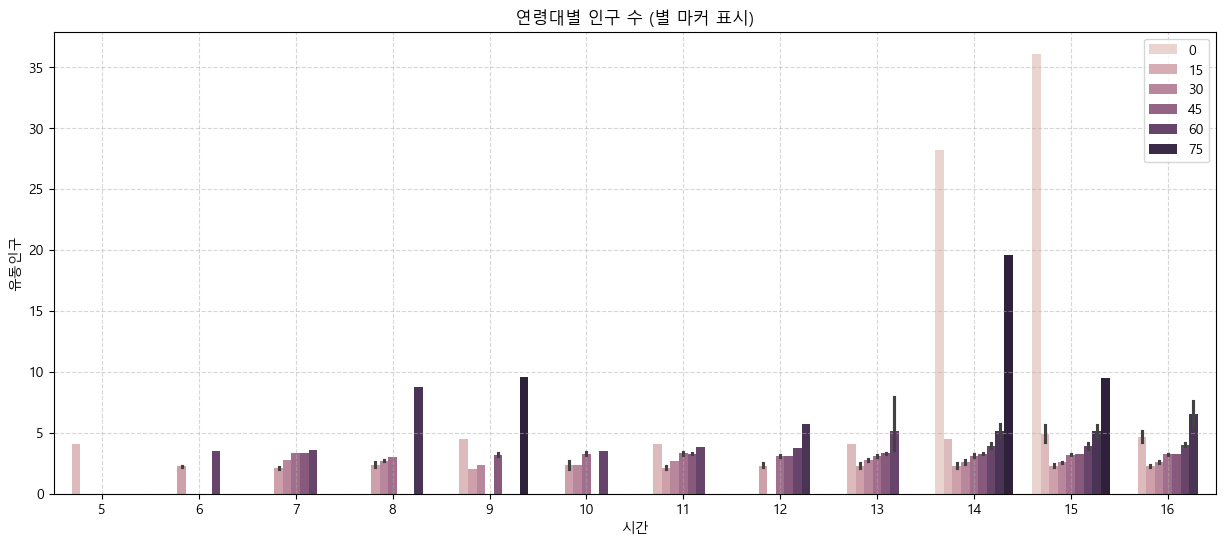

In [77]:
plt.rcParams['font.family'] = 'Malgun Gothic'   # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  

# df["move_st_hr"] = df["move_st_hr"].dt.hour
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x = "move_st_hr", y = "popl_cnt", hue = "age_grp")

plt.xlabel("시간")
plt.ylabel("유동인구")
plt.title("연령대별 인구 수 (별 마커 표시)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.legend()
plt.show()

In [69]:
df["move_st_hr"].head()

0   2019-09-30 05:00:00
1   2019-09-30 06:00:00
2   2019-09-30 06:00:00
3   2019-09-30 06:00:00
4   2019-09-30 07:00:00
Name: move_st_hr, dtype: datetime64[ns]